Предсказание суммарной стоимости акций starBucks

> Источники сего творчества:
> 
> - lstm нейросети и предстказания + датасет
> 
>     https://cnvrg.io/pytorch-lstm/
> 
> - график плотности распределения
> 
>     https://seaborn.pydata.org/generated/seaborn.kdeplot.html
> 
> - квантили
> 
>     https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy
>
> - коррелограммы
> 
>     https://habr.com/ru/articles/207160/

# Люди добрые, берите другой датасет, с ВВП стран или объемами урожая например или другие акции и т.д.

> ВВП стран и регионов
> 
> https://www.kaggle.com/code/stieranka/predicting-gdp-world-countries
>
> Ценные бумаги
>
> https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

In [1]:
import numpy as np
import pandas as pd
# df = pd.read_csv('GOOGL.csv', index_col = 'Date', parse_dates=True)
df = pd.read_csv('SBUX.csv', index_col = 'Date', parse_dates=True)
LEARNING_POINTS = round(df.shape[0] * 0.8) # 200 for SBUX
NUM_FEATURES_N = 4 # 5
HIDDEN_SIZE_N = 7 # 10
SHIFT_N = -15 # -30

In [2]:
# round(df.shape[0] * 0.8) 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,79.847794,4921900
2019-12-12,88.000000,88.889999,87.540001,88.209999,81.341652,10282100
2019-12-13,88.019997,88.790001,87.580002,88.669998,81.765823,6714100
2019-12-16,89.139999,89.300003,88.430000,88.779999,81.867256,6705600
2019-12-17,88.870003,88.970001,87.470001,88.129997,81.267868,7296900


In [3]:
df['MA'] = df['Open'].rolling(window=5, min_periods=1).mean()
df['STD'] = df['Open'].rolling(window=5, min_periods=1).std()

df['MA_lead_15'] = df['MA'].shift(SHIFT_N)
df['MA_lead_15'] = df['MA_lead_15'].fillna(df['MA'])

# df.fillna(df.mean(), inplace=True)
# df['MA'] = df['MA'].fillna(df['MA'].mean(), inplace=True)
# df['STD'] = df['STD'].fillna(df['STD'].mean(), inplace=True)

In [4]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MA,STD,MA_lead_15
Date,,,,,,,,,
2020-11-27,98.480003,98.980003,98.279999,98.660004,92.854355,2169700,97.906001,0.537848,97.906001
2020-11-30,98.199997,98.290001,96.959999,98.019997,92.252014,5197300,98.062001,0.470552,98.062001
2020-12-01,99.000000,99.260002,98.250000,98.820000,93.004936,4970000,98.338000,0.545270,98.338000
2020-12-02,98.510002,99.040001,98.209999,98.910004,93.089638,3377900,98.538000,0.288653,98.538000
2020-12-03,99.019997,101.000000,98.970001,100.110001,94.219017,6264100,98.642000,0.357099,98.642000
2020-12-04,101.349998,102.940002,101.070000,102.279999,96.261322,6952700,99.215999,1.241946,99.215999
2020-12-07,102.010002,102.220001,100.690002,101.410004,95.442535,4514800,99.978000,1.584352,99.978000
2020-12-08,100.370003,101.570000,100.010002,101.209999,95.254303,3911300,100.252000,1.488496,100.252000
2020-12-09,101.940002,102.209999,100.099998,100.400002,94.491951,6629900,100.938000,1.257408,100.938000


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

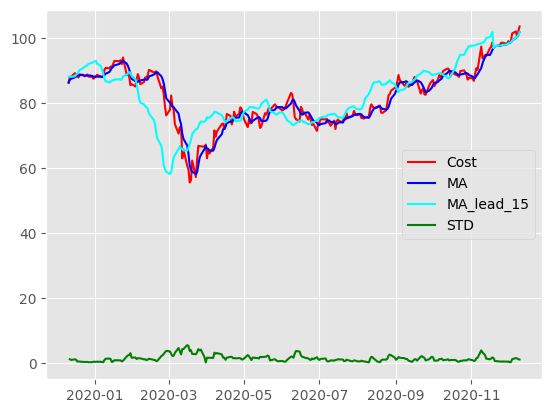

In [6]:
plt.style.use('ggplot')
plt.plot(df.index, df['Open'], label='Cost', color='red')
plt.plot(df.index, df['MA'], label= 'MA', color='blue')
plt.plot(df.index, df['MA_lead_15'], label= 'MA_lead_15', color='cyan')
plt.plot(df.index, df['STD'], label= 'STD', color='green')

plt.legend() 
plt.show()

In [7]:
 df['feature'] = df['MA_lead_15']

In [8]:
# X = df.iloc[:, :NUM_FEATURES_N]
# y = df.iloc[:, NUM_FEATURES_N:6] 
X = df.iloc[:, :NUM_FEATURES_N]
y = df[['feature']]

In [9]:
X.head()

,Open,High,Low,Close
Date,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996
2019-12-12,88.000000,88.889999,87.540001,88.209999
2019-12-13,88.019997,88.790001,87.580002,88.669998
2019-12-16,89.139999,89.300003,88.430000,88.779999
2019-12-17,88.870003,88.970001,87.470001,88.129997


In [10]:
y

,feature
Date,
2019-12-11,88.068002
2019-12-12,88.068002
2019-12-13,88.058002
2019-12-16,88.158002
2019-12-17,88.584001
...,...
2020-12-04,99.215999
2020-12-07,99.978000
2020-12-08,100.252000


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [12]:
#first LEARNING_POINTS for training

X_train = X_ss[:LEARNING_POINTS, :]
X_test = X_ss[LEARNING_POINTS:, :]

y_train = y_mm[:LEARNING_POINTS, :]
y_test = y_mm[LEARNING_POINTS:, :] 

In [13]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (202, 4) (202, 1)
Testing Shape (51, 4) (51, 1)


In [14]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [15]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [16]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

In [17]:
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([202, 1, 4]) torch.Size([202, 1])
Testing Shape torch.Size([51, 1, 4]) torch.Size([51, 1])


In [18]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        # self.dropout = 0.1 # 0
        
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out
 

In [19]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = NUM_FEATURES_N #number of features
# hidden_size = 2 #number of features in hidden state
# num_layers = 1 #number of stacked lstm layers
hidden_size = HIDDEN_SIZE_N #number of features in hidden state - independent? -10
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes

In [20]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [21]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [22]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.22288
Epoch: 100, loss: 0.01922
Epoch: 200, loss: 0.01715
Epoch: 300, loss: 0.01611
Epoch: 400, loss: 0.01373
Epoch: 500, loss: 0.01221
Epoch: 600, loss: 0.01160
Epoch: 700, loss: 0.01116
Epoch: 800, loss: 0.01088
Epoch: 900, loss: 0.01068


In [23]:
# df_X_ss = ss.transform(df.iloc[:, :-1]) #old transformers
# df_y_mm = mm.transform(df.iloc[:, -1:]) #old transformers

df_X_ss = ss.transform(X) #old transformers
df_y_mm = mm.transform(y) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

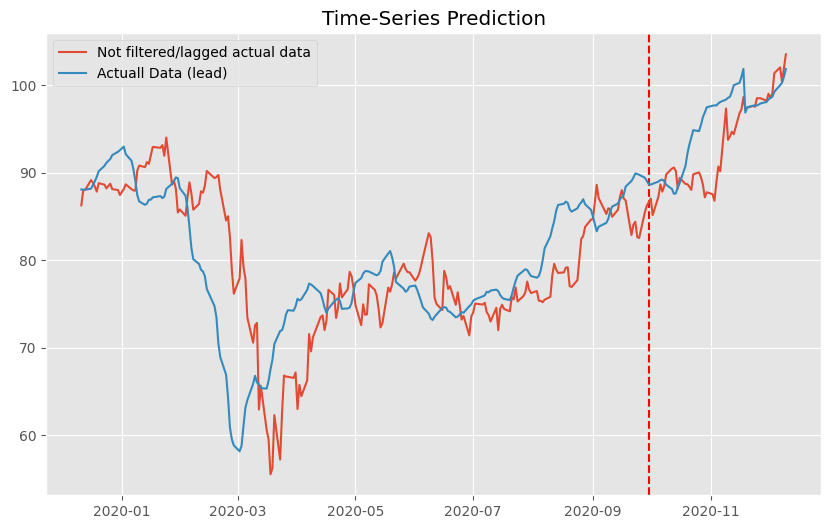

In [24]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(df.index[LEARNING_POINTS], c='r', linestyle='--') #size of the training set

df['predicted'] = data_predict
df['predicted'] = df['predicted'].rolling(window=5, min_periods=1).mean() #FIXME: MA

plt.plot(df['Open'], label='Not filtered/lagged actual data') #actual plot
plt.plot(df['feature'], label='Actuall Data (lead)') #actual plot
# plt.plot(df['predicted_MA'], label='Predicted Data (lead)') #predicted plot

# plt.plot(dataY_plot, label='Actuall Data') #actual plot
# plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [25]:
# dataY_plot
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA,STD,MA_lead_15,feature,predicted
Date,,,,,,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,79.847794,4921900,86.260002,NaN,88.068002,88.068002,87.860703
2019-12-12,88.000000,88.889999,87.540001,88.209999,81.341652,10282100,87.130001,1.230364,88.068002,88.068002,87.012207
2019-12-13,88.019997,88.790001,87.580002,88.669998,81.765823,6714100,87.426666,1.010410,88.058002,88.058002,86.814855
2019-12-16,89.139999,89.300003,88.430000,88.779999,81.867256,6705600,87.855000,1.189326,88.158002,88.158002,86.766350
2019-12-17,88.870003,88.970001,87.470001,88.129997,81.267868,7296900,88.058000,1.125575,88.584001,88.584001,86.489545
2019-12-18,88.389999,88.849998,87.820000,87.989998,81.138786,5859200,88.484000,0.509344,89.012001,89.012001,86.260292
2019-12-19,87.830002,88.589996,87.580002,88.519997,81.627502,6022100,88.450000,0.553489,89.514001,89.514001,86.422032
2019-12-20,88.790001,89.000000,87.889999,88.459999,81.572182,14271500,88.604001,0.509293,90.160002,90.160002,86.393742
2019-12-23,88.620003,88.849998,88.180000,88.230003,81.360100,4349700,88.500002,0.417253,90.772002,90.772002,86.540968


<Axes: ylabel='Density'>

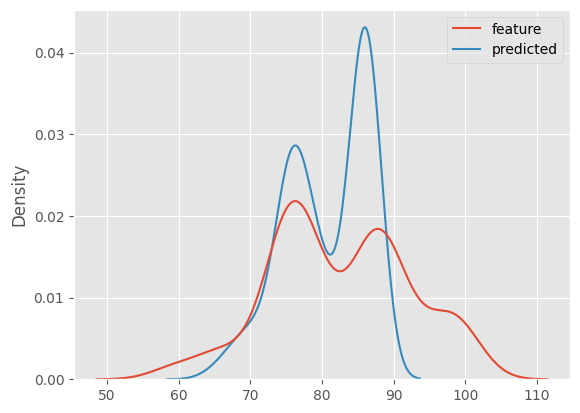

In [26]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
sns.kdeplot(data=df[['feature', 'predicted']])

In [27]:
import pylab 
import scipy.stats as stats

In [28]:
# stats.probplot(df['feature'], dist="norm", plot=pylab)
# stats.probplot(df['predicted'], dist="norm", plot=pylab)
# pylab.show()

In [29]:
# df = df.assign(feauture_norm=lambda x: (x['feature'] - x['feature'][x['feature'] > 0].min() / (x['feature'][x['feature'] > 0].max()- x['feature'][x['feature'] > 0].min())))

In [30]:
# df2 = df.reset_index()
# sns.kdeplot(data=df2['feauture_norm'])

In [31]:
# df2

In [32]:
# df2['feauture_norm']

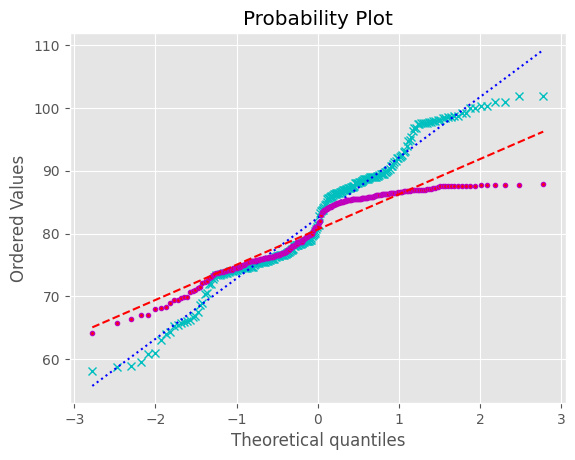

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = df['feature']
res = stats.probplot(x, plot=plt)
ax.get_lines()[0].set_marker('x')
ax.get_lines()[0].set_markerfacecolor('c')
ax.get_lines()[0].set_color('c')
ax.get_lines()[1].set_color('b')
ax.get_lines()[1].set_linestyle(':')

x = df['predicted']
res = stats.probplot(x, plot=plt)
ax.get_lines()[2].set_marker('.')
ax.get_lines()[2].set_markerfacecolor('r')
ax.get_lines()[2].set_color('m')
ax.get_lines()[3].set_color('r')
ax.get_lines()[3].set_linestyle('--')

plt.show()

In [34]:
df['diff'] = df['feature'] - df['predicted']

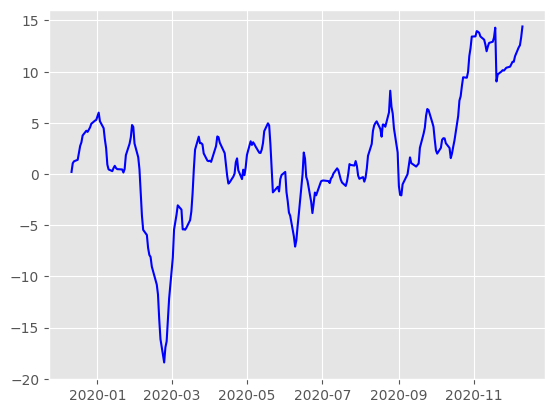

In [35]:
plt.style.use('ggplot')
plt.plot(df.index, df['diff'], color='blue')
plt.show()

In [36]:
import statsmodels.api as sm

In [37]:
# reinit for refresh
from matplotlib import pyplot as plt

<Figure size 640x480 with 0 Axes>

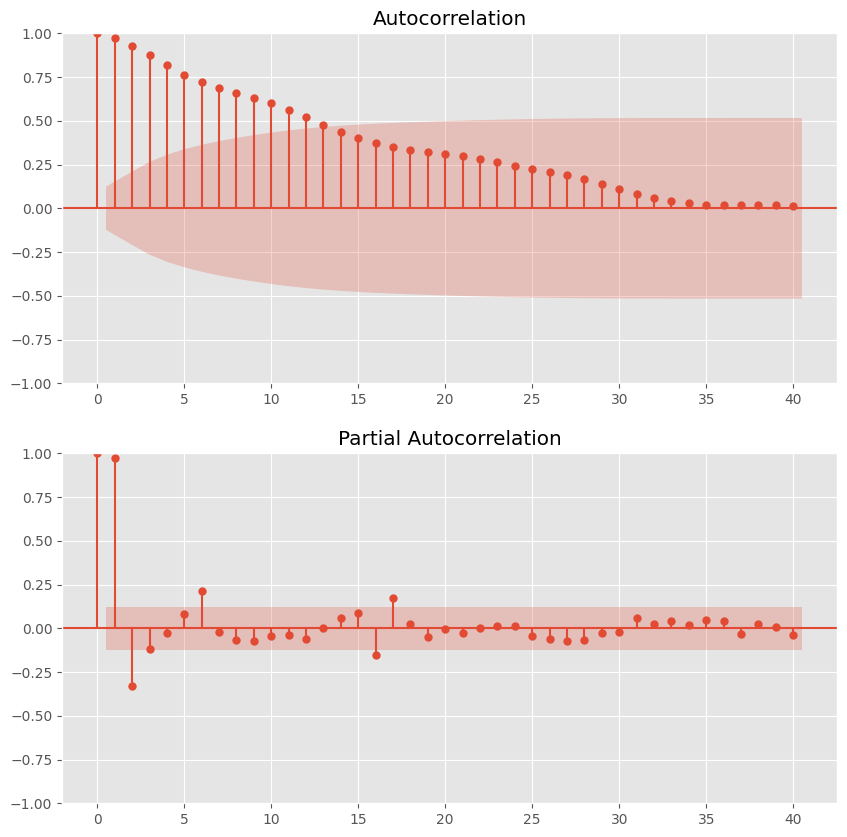

In [51]:
plt.cla()
plt.clf()

LAGS=40

fig, ax = plt.subplots(2,1,figsize=(10,10))
sm.graphics.tsa.plot_acf(df['diff'].values.squeeze(), lags=LAGS, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['diff'].values.squeeze(), lags=LAGS, ax=ax[1])
plt.show()

In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA,STD,MA_lead_15,feature,predicted,diff
Date,,,,,,,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,79.847794,4921900,86.260002,NaN,88.068002,88.068002,87.860703,0.207300
2019-12-12,88.000000,88.889999,87.540001,88.209999,81.341652,10282100,87.130001,1.230364,88.068002,88.068002,87.012207,1.055795
2019-12-13,88.019997,88.790001,87.580002,88.669998,81.765823,6714100,87.426666,1.010410,88.058002,88.058002,86.814855,1.243147
2019-12-16,89.139999,89.300003,88.430000,88.779999,81.867256,6705600,87.855000,1.189326,88.158002,88.158002,86.766350,1.391652
2019-12-17,88.870003,88.970001,87.470001,88.129997,81.267868,7296900,88.058000,1.125575,88.584001,88.584001,86.489545,2.094457


In [40]:
df2 = df.copy()

In [41]:
# df2["predicted"] = df2['predicted'] #.shift(SHIFT_N)
# df2['predicted'] = df2['predicted'] #.fillna(df['Open'])

In [42]:
df2['diff_cost_relative'] = (df2['predicted'] - df2['Open']) / (0.5 * (df2['predicted'] + df2['Open']))

In [43]:
df2

,Open,High,Low,Close,Adj Close,Volume,MA,STD,MA_lead_15,feature,predicted,diff,diff_cost_relative
Date,,,,,,,,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,79.847794,4921900,86.260002,NaN,88.068002,88.068002,87.860703,0.207300,0.018386
2019-12-12,88.000000,88.889999,87.540001,88.209999,81.341652,10282100,87.130001,1.230364,88.068002,88.068002,87.012207,1.055795,-0.011288
2019-12-13,88.019997,88.790001,87.580002,88.669998,81.765823,6714100,87.426666,1.010410,88.058002,88.058002,86.814855,1.243147,-0.013786
2019-12-16,89.139999,89.300003,88.430000,88.779999,81.867256,6705600,87.855000,1.189326,88.158002,88.158002,86.766350,1.391652,-0.026988
2019-12-17,88.870003,88.970001,87.470001,88.129997,81.267868,7296900,88.058000,1.125575,88.584001,88.584001,86.489545,2.094457,-0.027149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,101.349998,102.940002,101.070000,102.279999,96.261322,6952700,99.215999,1.241946,99.215999,99.215999,87.711426,11.504573,-0.144277
2020-12-07,102.010002,102.220001,100.690002,101.410004,95.442535,4514800,99.978000,1.584352,99.978000,99.978000,87.603157,12.374843,-0.151960
2020-12-08,100.370003,101.570000,100.010002,101.209999,95.254303,3911300,100.252000,1.488496,100.252000,100.252000,87.666699,12.585301,-0.135115


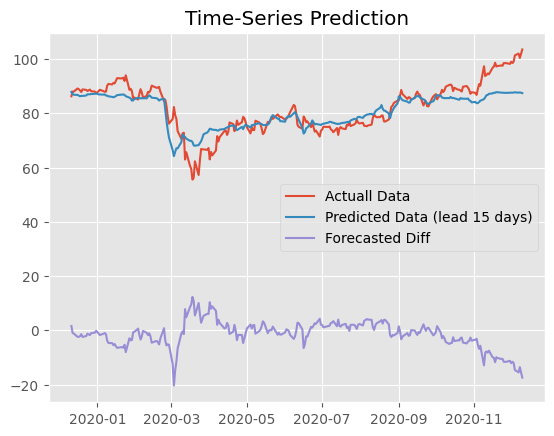

In [54]:
plt.plot(df2['Open'], label='Actuall Data') #actual plot
# plt.plot(df2['predicted'], label='Predicted Data')

plt.plot(df2['predicted'], label='Predicted Data (lead 15 days)') #predicted plot
# plt.plot(df2['predicted'].shift(-SHIFT_N), label='Predicted Data (lead recovered)') #predicted plot
plt.plot(df2['diff_cost_relative'] * df2['Open'], label='Forecasted Diff')
# plt.plot(dataY_plot, label='Actuall Data') #actual plot
# plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [45]:
cash = [100000]
assets = [0]
overall = [100000]
koeff = 0.5
min_diff = 0.05
i = 0

for index, row in df2.iterrows():
    buy_assets = (koeff * cash[i] * row['diff_cost_relative']) // row['Open']
    spend_cash = buy_assets * row['Open']
    if (cash[i] - spend_cash >= 0) and (assets[i] + buy_assets >= 0) and abs(row['diff_cost_relative']) > min_diff:
        cash.append(cash[i] - spend_cash)
        assets.append(assets[i] + buy_assets)
    else:
        cash.append(cash[i])
        assets.append(assets[i])
    i += 1
    overall.append(cash[i] + assets[i] * row['Open'])
    

In [46]:
overall[-1]

142638.98060600003

In [47]:
df2['cash'] = cash[1:]
df2['assets'] = assets[1:]
df2['assets_cost'] = df2['assets'] * df2['Open']
df2['overall'] = overall[1:]

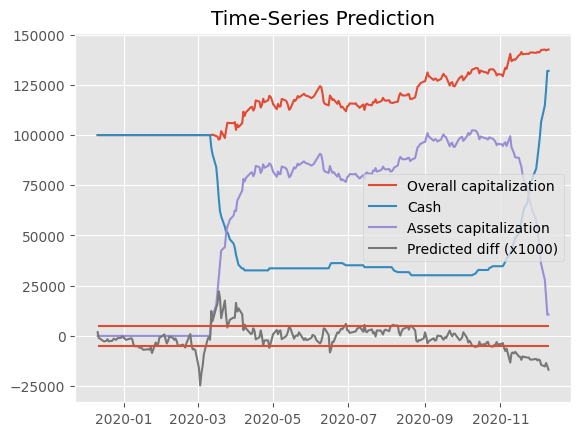

In [70]:
plt.plot(df2['overall'], label='Overall capitalization') #actual plot
plt.plot(df2['cash'], label='Cash')
# plt.plot(df2['assets'] * 100, label='Assets N (x100)')
plt.plot(df2['assets_cost'], label='Assets capitalization') #predicted plot
# plt.plot(df2['feature'] * 1000, label='Cost (x1000)')
plt.plot(df2['diff_cost_relative'] * 100000, label='Predicted diff (x1000)')
plt.hlines([-min_diff * 100000, min_diff * 100000], df2.index[0], df2.index[-1]) 
# plt.plot(y=2, label='f diff (x1000)')


# plt.plot(dataY_plot, label='Actuall Data') #actual plot
# plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 